# Setting up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/cancer-probabilities/cancer-probabilities.csv")
df.head(5)

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,1,Heavy,Frequent,Low,Low,Low,0.8
1,2,Occasional,Moderate,High,High,High,0.2
2,3,NaN,NaN,High,High,High,0.1
3,4,Heavy,Frequent,Low,Low,Low,0.9
4,5,Moderate,Occasional,Medium,Medium,Medium,0.4


**Dataset Descripton**

Sr No.: A unique identifier for each observation.

Smoking Habit: Categorizes individuals based on their smoking frequency (e.g., Heavy, Moderate, Occasional, None).

Drinking Habit: Categorizes individuals based on their alcohol consumption frequency (e.g., Frequent, Occasional, None).

Biking Habit: Measures the frequency of biking activity (e.g., High, Medium, Low).

Walking Habit: Measures the frequency of walking activity (e.g., High, Medium, Low).

Jogging Habit: Measures the frequency of jogging activity (e.g., High, Medium, Low).

Probability of Cancer: A numerical value representing the estimated likelihood of developing cancer, ranging from 0 to 1.

In [3]:
df.info()

# Data Preprocessing
# Issue with the dataset: it takes "None" level for smoking and biking habits as NaN values
# Need to replace the Nan values as string "None"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr No.                 50 non-null     int64  
 1   Smoking Habit          34 non-null     object 
 2   Drinking Habit         34 non-null     object 
 3   Biking Habit           50 non-null     object 
 4   Walking Habit          50 non-null     object 
 5   Jogging Habit          50 non-null     object 
 6   Probability of Cancer  50 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [4]:
df.isna().sum()

Sr No.                    0
Smoking Habit            16
Drinking Habit           16
Biking Habit              0
Walking Habit             0
Jogging Habit             0
Probability of Cancer     0
dtype: int64

In [5]:
df = df.fillna("None")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr No.                 50 non-null     int64  
 1   Smoking Habit          50 non-null     object 
 2   Drinking Habit         50 non-null     object 
 3   Biking Habit           50 non-null     object 
 4   Walking Habit          50 non-null     object 
 5   Jogging Habit          50 non-null     object 
 6   Probability of Cancer  50 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [6]:
df.isna().sum()

Sr No.                   0
Smoking Habit            0
Drinking Habit           0
Biking Habit             0
Walking Habit            0
Jogging Habit            0
Probability of Cancer    0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)



In [8]:
import seaborn as sns

cols = df.columns
cols

Index(['Sr No.', 'Smoking Habit', 'Drinking Habit', 'Biking Habit',
       'Walking Habit', 'Jogging Habit', 'Probability of Cancer'],
      dtype='object')

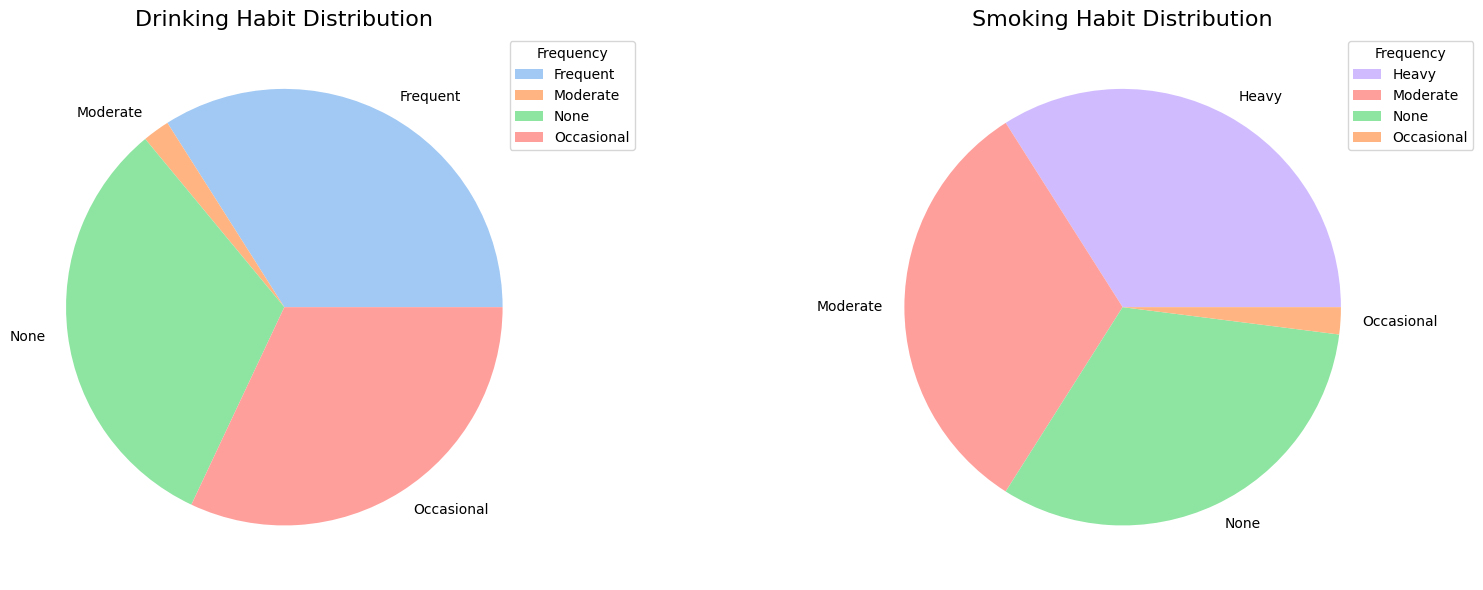

In [9]:
# Making Pie Charts for 'Drinking Habit' and 'Smoking Habit' Features
colors = sns.color_palette('pastel')[0:5] # Set colors to Seaborn Theme
reversed_colors = colors[::-1]

fig, axes = plt.subplots(1, 2, figsize=(18, 6)) # Make a Subplot with two figures
 
# Make the pie chart for 'Drinking Habit' and set the axes to axes[0], adding it to the subplot
axes[0] = df.groupby(['Drinking Habit']).count().plot(kind='pie', ax = axes[0],y='Sr No.',colors=colors)  # Group By target column with count and set y to index column
axes[0].legend(bbox_to_anchor=(0.9, 1), loc='upper left',fontsize=10,title='Frequency')
axes[0].set_title("Drinking Habit Distribution",fontsize=16)
axes[0].set_ylabel('',fontsize=12, labelpad = 15)  # labelpad adds padding between label and chart

# Do the same for "Smoking Habits"
axes[1] = df.groupby(['Smoking Habit']).count().plot(kind='pie', ax = axes[1],y='Sr No.',colors=reversed_colors) 
axes[1].legend(bbox_to_anchor=(0.9, 1), loc='upper left',fontsize=10,title='Frequency')
axes[1].set_title("Smoking Habit Distribution",fontsize=16)
axes[1].set_ylabel('',fontsize=12, labelpad = 30)

plt.tight_layout()
plt.subplots_adjust(wspace=-0.1) # reduces the space between subplots

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


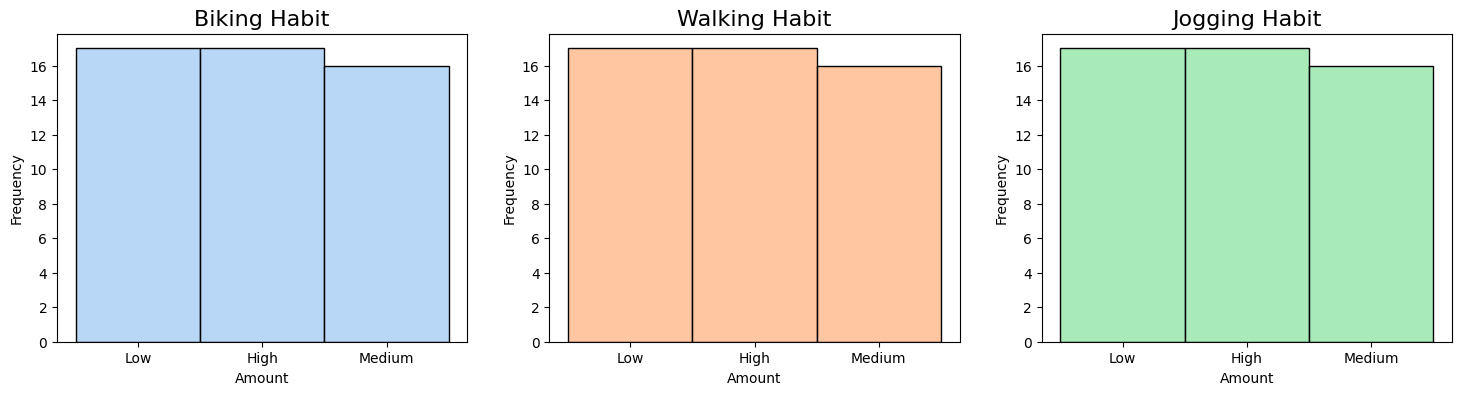

In [10]:
# Making Histograms for the other 3 features: "Biking Habit", "Walking Habit", "Jogging Habit"
lst = ["Biking Habit", "Walking Habit", "Jogging Habit"]
figs,axes = plt.subplots(1,3,figsize=(18,4))

colors = sns.color_palette('pastel')[0:3] # Set colors to Seaborn Theme

for index,i in enumerate(lst):
    sns.histplot(df[i],ax=axes[index],color=colors[index])  # Make histplot, set ax to subplot axes and color to the specified color
    axes[index].set_title(lst[index],fontsize=16)
    axes[index].set_ylabel("Frequency")
    axes[index].set_xlabel("Amount")

# Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

Label Encoder will be used for simplicity in this notebook

* **Label Encoder** turns the categorical data into numerical in a simple way
    - ['a', 'b', 'c', 'a'] = [0,1,2,0]

* **One hot encoder** turns the categorical data into a bitmap
    - ['a', 'b']$^T$  = [1,0],[0,1]


In [12]:
# Drop the ID feature 
df = df.drop('Sr No.',axis=1)

In [13]:
# Apply the label encoder to each categorical feature

for i in df.columns[:-1]:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
df.head()

,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,0,0,1,1,1,0.8
1,3,1,0,0,0,0.2
2,2,2,0,0,0,0.1
3,0,0,1,1,1,0.9
4,1,3,2,2,2,0.4


Text(0.5, 14.722222222222216, 'Features')

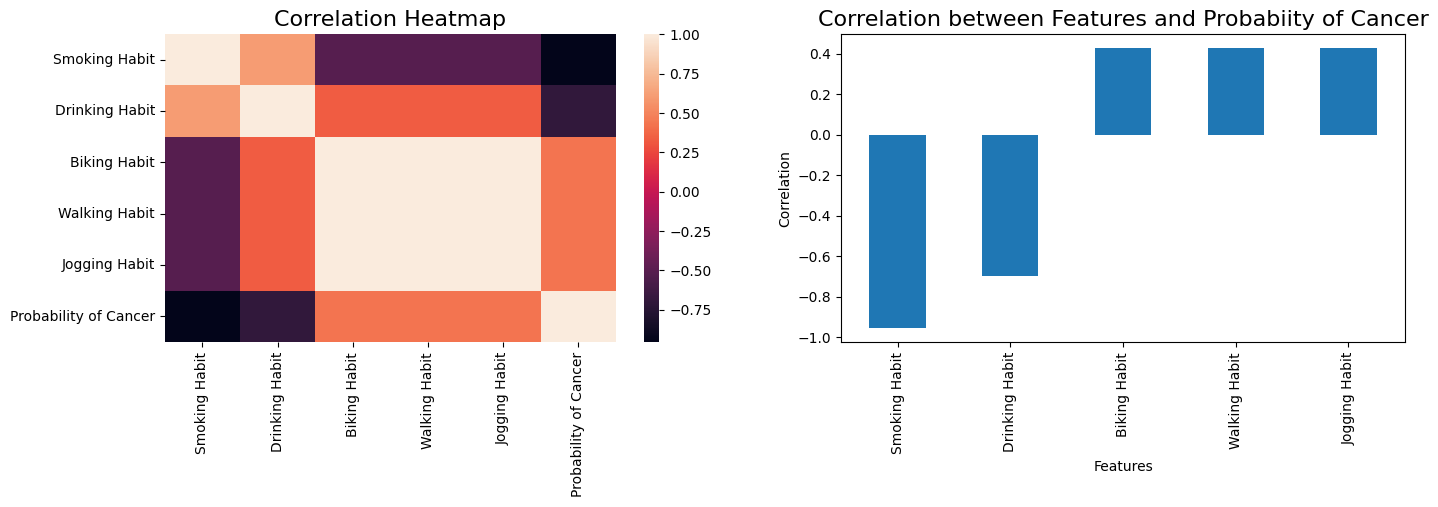

In [14]:
# check correlation for features vs target and make a heatmap + correlation bar graph

figs,axes = plt.subplots(1,2,figsize=(16,4))
sns.heatmap(df.corr(),ax=axes[0])
axes[0].set_title('Correlation Heatmap',fontsize=16)


df.corr()['Probability of Cancer']
df.corr()['Probability of Cancer'].sort_values()[:-1].plot(kind='bar')
axes[1].set_title("Correlation between Features and Probabiity of Cancer",fontsize=16)
axes[1].set_ylabel("Correlation")
axes[1].set_xlabel("Features")

In [15]:
# Check dataset before the next section
# All the features have been turned into numeric data
df.head()

,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,0,0,1,1,1,0.8
1,3,1,0,0,0,0.2
2,2,2,0,0,0,0.1
3,0,0,1,1,1,0.9
4,1,3,2,2,2,0.4


# Machine Learning Models

In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into features, X, and target label feature, y

X = df.drop('Probability of Cancer',axis=1)
y = df['Probability of Cancer']

# Split the data into training and testing dataset: 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
print("Total: X:",len(X)," y:",len(y))
print("Training amount: X:",len(X_train)," y:",len(y_train))
print("Testing amount: X:",len(X_test)," y:",len(y_test))


Total: X: 50  y: 50
Training amount: X: 33  y: 33
Testing amount: X: 17  y: 17


Time to predict the probability cancer!

This notebook will use 4 regression models + ANN in a later section:
- Linear regression
- KNN
- Decision Tree
- SVR (SVM regressor)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR

In [18]:
# Write a function to test prediction results
# MAE, MSE, RMSE and R2 scores are used for evaluation, up to 3 d.p.
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def evaluate_model(y_test,y_preds,name): 
    mae = round(mean_absolute_error(y_test, y_preds),3)
    mse = round(mean_squared_error(y_test, y_preds),3)
    rmse = round(np.sqrt(mse),3)
    r2 = round(r2_score(y_test,y_preds),3)
    print(name)
    print("Mean Absolute Error (MAE)\t:", mae)
    print("Mean Squared Error (MSE)\t:", mse )
    print('Root Mean Squared Error (RMSE)\t:', rmse)
    print('R-squred (r2) score\t\t:', r2)
    return [mae,mse,rmse,r2,name]
    
def compare_results(y_test,y_preds,model_name,axes,color):
    sns.scatterplot(x=y_test,y=y_preds,ax=axes,color=color)
    
    # Add a diagonal line to represent perfect prediction
    axes.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

    axes.set_title(model_name, fontsize=16)
    axes.set_xlabel('True labels')
    axes.set_ylabel('Predicted Labels')


In [19]:
# Make linear regression model, fit it to train data 
lr = LinearRegression().fit(X_train,y_train)
lr.score(X_train,y_train) #0.974 r2_score on unseen train data

# predict using test data
lr_preds = lr.predict(X_test)

#evaluate the predicted values with true values
lr_eval_results = evaluate_model(y_test,lr_preds,"Linear Regression")

Linear Regression
Mean Absolute Error (MAE)	: 0.045
Mean Squared Error (MSE)	: 0.004
Root Mean Squared Error (RMSE)	: 0.063
R-squred (r2) score		: 0.964


In [20]:
knn = KNeighborsRegressor(n_neighbors = 5).fit(X_train,y_train) # 5 neighbors cuz 5 features

# predict using test data
knn_preds = knn.predict(X_test)

# evaluate truth vs predicted values
knn_eval_results = evaluate_model(y_test,knn_preds, "KNN Regressor")

KNN Regressor
Mean Absolute Error (MAE)	: 0.045
Mean Squared Error (MSE)	: 0.004
Root Mean Squared Error (RMSE)	: 0.063
R-squred (r2) score		: 0.961


In [21]:
# Decision Tree
tree = DecisionTreeRegressor().fit(X_train,y_train)

# predict
dt_preds = tree.predict(X_test)


# evaluate
dt_eval_results = evaluate_model(y_test,dt_preds,"Decision Tree Regressor")

Decision Tree Regressor
Mean Absolute Error (MAE)	: 0.046
Mean Squared Error (MSE)	: 0.004
Root Mean Squared Error (RMSE)	: 0.063
R-squred (r2) score		: 0.961


In [22]:
# SVM Regressor with default tolerance treshhold
svm = LinearSVR(tol=0.0001).fit(X_train,y_train) 

# predict
svm_preds = svm.predict(X_test)

# evaluate
svm_eval_results = evaluate_model(y_test,svm_preds,"SVM Regressor")

SVM Regressor
Mean Absolute Error (MAE)	: 0.048
Mean Squared Error (MSE)	: 0.005
Root Mean Squared Error (RMSE)	: 0.071
R-squred (r2) score		: 0.953


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Evaluation for ML Models

All of the models are performing very well with **Linear Regression** having the best **r2-score** of **0.964**, 0.003 points higher than decision tree and knn.

Other metrics like MAE, MSE and RMSE are all practically the same for the models with 0.001 differences. Can look at the figure below to see truth values vs predicted values for each model


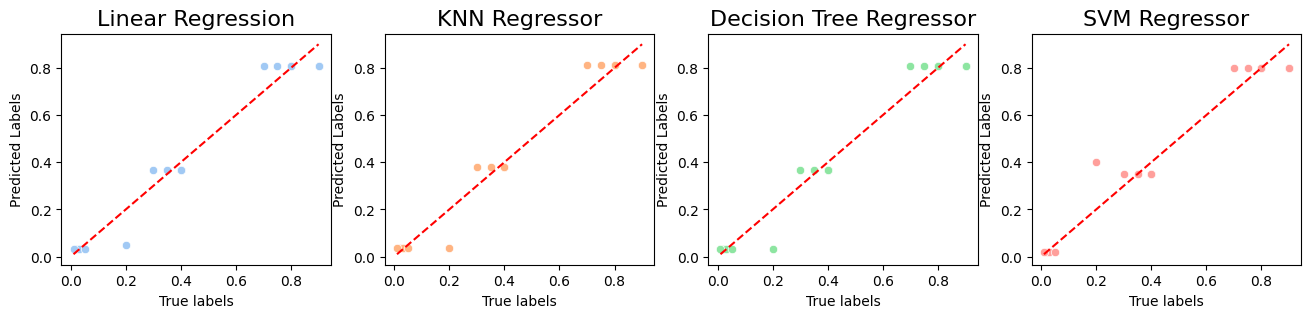

In [23]:
preds = [lr_preds,knn_preds,dt_preds,svm_preds]
models = ["Linear Regression","KNN Regressor","Decision Tree Regressor","SVM Regressor"]

figs,axes= plt.subplots(1,4,figsize=(16,3)) # make a 1 by 4 subplot
colors = sns.color_palette('pastel')[0:4] # 4 colors from sns colors

for index,i in enumerate(preds):
    compare_results(y_test,i,models[index],axes=axes[index],color=colors[index]) #call the figure function
    

# Neural Network with Pytorch

In [24]:
# Check: https://machinelearningmastery.com/building-a-regression-model-in-pytorch/